# Práctica 

#### Hernández González Ricardo Paramont

**********************

### Dependencias 

In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from scipy.stats import chisquare
from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

from itertools import chain
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

cf.go_offline()
pd.set_option('display.max_columns',None)

### Importación de datos

In [2]:
df = pd.read_csv('atm.csv')
df.head()

,ts_transaction_date,id_atm
0,2017-03-22,ATM058
1,2017-05-09,ATM070
2,2017-06-16,ATM070
3,2017-10-06,ATM052
4,2017-11-30,ATM099


In [3]:
len(df)

2468572

### Análisis exploratorio 

#### Ausentes

In [4]:
miss = 1-df.describe().T[['count']]/len(df)
miss.sort_values(by='count',ascending=False)

,count
ts_transaction_date,0.0
id_atm,0.0


#### Distribuciones

<AxesSubplot:>

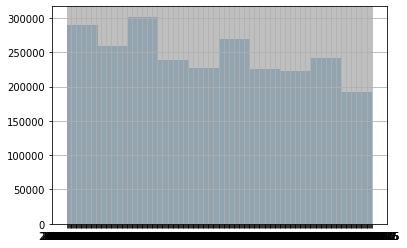

In [5]:
df['ts_transaction_date'].hist()

### Ingeniería de variables

In [6]:
df.dtypes

ts_transaction_date    object
id_atm                 object
dtype: object

In [7]:
df['ts_transaction_date'] = pd.to_datetime(df['ts_transaction_date'])

In [8]:
df.dtypes

ts_transaction_date    datetime64[ns]
id_atm                         object
dtype: object

In [40]:
# confirmamos que solo hay registros del año 2017
np.unique(df['ts_transaction_date'].dt.year)

array([2017])

#### Obteniendo semestre

In [9]:
df['semestre']=(df['ts_transaction_date'].dt.month>6).astype(int)+1

#### Obteniendo cuatrimestre

In [10]:
df['cuatrimestre']=(df['ts_transaction_date'].dt.month/4).apply(np.ceil)

#### Obteniendo bimestre

In [11]:
df['bimestre']=(df['ts_transaction_date'].dt.month/2).apply(np.ceil)

visualizando

array([[<AxesSubplot:title={'center':'semestre'}>,
        <AxesSubplot:title={'center':'cuatrimestre'}>],
       [<AxesSubplot:title={'center':'bimestre'}>, <AxesSubplot:>]],
      dtype=object)

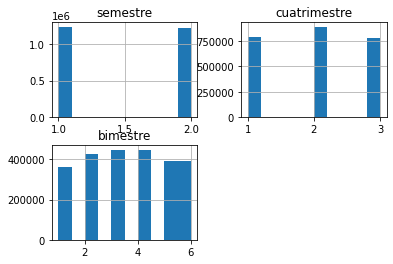

In [12]:
varc = ['semestre','cuatrimestre','bimestre']
df[varc].hist()

In [13]:
df[varc].value_counts()

semestre  cuatrimestre  bimestre
1         2.0           3.0         447584
2         2.0           4.0         444900
1         1.0           2.0         428451
2         3.0           5.0         393768
                        6.0         391015
1         1.0           1.0         362854
dtype: int64

### Cambio de espacios

In [14]:
X = df[varc].sample(1_000,random_state=0).copy()


In [15]:
df_sample = df.sample(1_000,random_state=0).copy()


### PCA $\mathcal{X}\to\mathcal{X}_p$

In [16]:
sc = StandardScaler()
pca = PCA(n_components=3)
Xp = pd.DataFrame(pca.fit_transform(sc.fit_transform(X)))
print(pca.explained_variance_ratio_.cumsum())
Xp

[0.91223888 0.98808127 1.        ]


,0,1,2
0,1.898600,-0.084745,0.256892
1,1.898600,-0.084745,0.256892
2,-2.155960,0.247300,0.231452
3,-0.687324,-0.720773,0.027950
4,1.898600,-0.084745,0.256892
...,...,...,...
995,-2.155960,0.247300,0.231452
996,-1.789933,0.121243,-0.246645
997,2.264628,-0.210802,-0.221205
998,1.898600,-0.084745,0.256892


### MDS $\mathcal{X}\to\mathcal{X}_m$

In [17]:
sc = MinMaxScaler()
mds = MDS(n_components=3,n_jobs=-1)
Xm = pd.DataFrame(mds.fit_transform(sc.fit_transform(X)))
Xm

,0,1,2
0,0.784881,-0.000399,-0.108159
1,0.784884,-0.000349,-0.108148
2,-0.796466,0.022042,0.276791
3,-0.356675,0.319472,-0.085028
4,0.784871,-0.000396,-0.108191
...,...,...,...
995,-0.796524,0.022080,0.276687
996,-0.736622,-0.015416,0.094541
997,0.839274,-0.060424,-0.288884
998,0.784876,-0.000265,-0.108169


### t-SNE $\mathcal{X}\to\mathcal{X}_t$

In [18]:
sc = MinMaxScaler()
tsne = TSNE(n_components=3,n_jobs=-1,perplexity=15)
Xt = pd.DataFrame(tsne.fit_transform(sc.fit_transform(X)))
Xt

,0,1,2
0,4.119973,29.024117,21.816719
1,16.073618,1.536911,-70.789955
2,-32.093472,-42.069557,-15.514924
3,42.886032,-11.573044,16.887306
4,8.951027,48.832016,17.800314
...,...,...,...
995,5.640967,-39.835453,-26.161572
996,-31.390608,-46.066837,45.090282
997,-54.380928,6.812093,2.900833
998,-40.248539,-39.649971,11.797894


### Visualización preeliminar

### Vectores

In [19]:
Xp.iplot(kind='scatter3d',x=0,y=1,z=2,mode='markers',color='purple')

In [20]:
Xm.iplot(kind='scatter3d',x=0,y=1,z=2,mode='markers',color='purple')

In [21]:
Xt.iplot(kind='scatter3d',x=0,y=1,z=2,mode='markers',color='purple')

### Densidad

<AxesSubplot:xlabel='0', ylabel='1'>

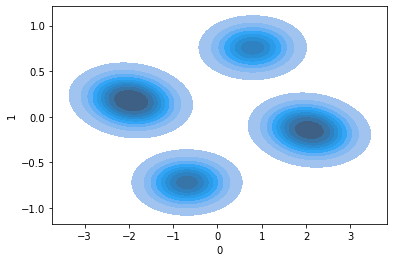

In [22]:
sns.kdeplot(data=Xp,x=0,y=1,fill=True)

<AxesSubplot:xlabel='0', ylabel='1'>

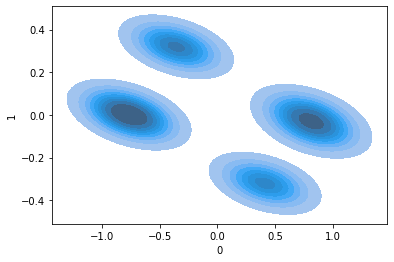

In [23]:
sns.kdeplot(data=Xm,x=0,y=1,fill=True)

<AxesSubplot:xlabel='0', ylabel='1'>

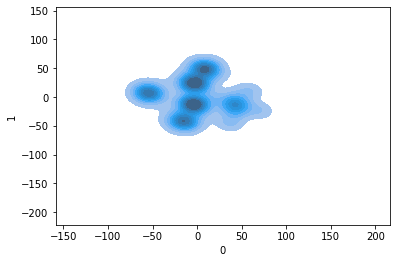

In [24]:
sns.kdeplot(data=Xt,x=0,y=1,fill=True)

## Clustering

In [25]:
sc = MinMaxScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=varc)

In [26]:
Xs

,semestre,cuatrimestre,bimestre
0,1.0,1.0,0.8
1,1.0,1.0,0.8
2,0.0,0.0,0.0
3,0.0,0.5,0.4
4,1.0,1.0,0.8
...,...,...,...
995,0.0,0.0,0.0
996,0.0,0.0,0.2
997,1.0,1.0,1.0
998,1.0,1.0,0.8


### Aglomerativo 

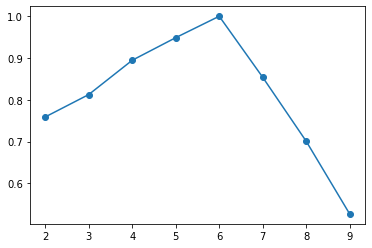

In [27]:
sil = pd.DataFrame(map(lambda k:(k,silhouette_score(Xs,
                                              AgglomerativeClustering(n_clusters=k).fit_predict(Xs))),
                 range(2,10)),columns=['k','sil'])
plt.plot(sil['k'],sil['sil'],marker='o')

In [28]:
k = 6
tipo = 'agg'
agg = AgglomerativeClustering(n_clusters=k)
df_sample[f'cl_{tipo}']=Xp[f'cl_{tipo}']=Xm[f'cl_{tipo}']=Xt[f'cl_{tipo}'] =agg.fit_predict(Xs[varc])

### K-medias

/home/paramont/work/envs/diplomado/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/home/paramont/work/envs/diplomado/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/home/paramont/work/envs/diplomado/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1077: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.



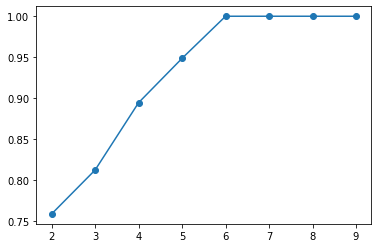

In [29]:
sil = pd.DataFrame(map(lambda k:(k,silhouette_score(Xs,
                                              KMeans(n_clusters=k,max_iter=1000).fit_predict(Xs))),
                 range(2,10)),columns=['k','sil'])
plt.plot(sil['k'],sil['sil'],marker='o')

In [30]:
k = 6
tipo = 'kme'
kme = KMeans(n_clusters=k,max_iter=1000)
df_sample[f'cl_{tipo}']=Xp[f'cl_{tipo}']=Xm[f'cl_{tipo}']=Xt[f'cl_{tipo}'] =kme.fit_predict(Xs[varc])

### Modelos Gaussianos Mixtos

/home/paramont/work/envs/diplomado/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/home/paramont/work/envs/diplomado/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/home/paramont/work/envs/diplomado/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.



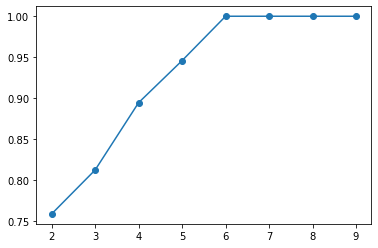

In [31]:
sil = pd.DataFrame(map(lambda k:(k,silhouette_score(Xs,
                                              GaussianMixture(n_components=k,max_iter=1000).fit_predict(Xs))),
                 range(2,10)),columns=['k','sil'])
plt.plot(sil['k'],sil['sil'],marker='o')

In [32]:
k = 6
tipo = 'gmm'
gmm = GaussianMixture(n_components=k,max_iter=1000)
df_sample[f'cl_{tipo}']=Xp[f'cl_{tipo}']=Xm[f'cl_{tipo}']=Xt[f'cl_{tipo}'] =gmm.fit_predict(Xs[varc])

### Selección final

In [33]:
varcl = sorted(df_sample.filter(like='cl_'))
for v in varcl:
    Xp[v] = Xp[v].astype(str)
    Xm[v] = Xm[v].astype(str)
    Xt[v] = Xt[v].astype(str)
    df_sample[v] = df_sample[v].astype(str)
    
pd.DataFrame(map(lambda cl:(cl,silhouette_score(Xs,df_sample[cl])),varcl),columns=['cluster','sil']).iplot(kind='bar',categories='cluster')

Se puede elegir cualquiera, nos quedamos con K-means.

### Visualización con cluster 

In [34]:
Xp.iplot(kind='scatter3d',x=0,y=1,z=2,mode='markers',categories='cl_kme')

### Guardando el archivo final

In [35]:
X_total = df[varc]

In [44]:
df['cluster']=kme.fit_predict(X_total[varc])

In [45]:
df['date'] = df['ts_transaction_date'].dt.strftime("%Y-%m")
df_final = df[['date','id_atm','cluster']]
df_final

,date,id_atm,cluster
0,2017-03,ATM058,4
1,2017-05,ATM070,0
2,2017-06,ATM070,0
3,2017-10,ATM052,1
4,2017-11,ATM099,5
...,...,...,...
2468567,2017-06,ATM016,0
2468568,2017-09,ATM070,1
2468569,2017-09,ATM043,1
2468570,2017-05,ATM079,0


In [47]:
df_final.to_csv('HERNANDEZ_GONZALEZ_RICARDO_PARAMONT.csv', index=False, header=False)